<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Module 4: Example with fully connected neural networks - Gradient descent, batch size and optimisers

In this notebook we'll see examples related to the batch size, the optimiser or the kind of gradient descent used to train the network.

To do so, we'll first define an artificial dataset using the method `make_blobs` available in `sklearn.datasets`.

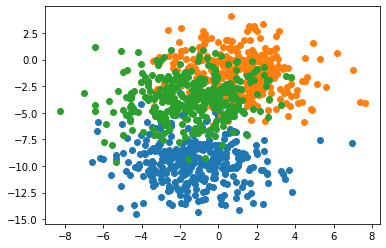

In [ ]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

### Vanila Gradient Descent

When using *Vanila Gradient Descent*, all the elements in the dataset are used at each step to compute the predictions, the gradients, the error and update the weights. Therefore, we are dealing with a `batch_size=dataset_size`.

This has some cons:

- It is not always possible to fit the entire dataset into memory, since GPU memory is limited
- Makes each iteration slower, since it needs to compute the gradients for every sample in the dataset
- Might end up trapped into a local minima that might be avoidable with the Stochastic Gradient Descent with a `batch_size << dataset_size`.

Epoch 1/100
1/1 [==============================] - 1s 926ms/step - loss: 2.9276 - accuracy: 0.2720 - val_loss: 2.2137 - val_accuracy: 0.3720
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 2.1218 - accuracy: 0.3960 - val_loss: 1.8236 - val_accuracy: 0.3600
Epoch 3/100
1/1 [==============================] - 0s 152ms/step - loss: 1.7475 - accuracy: 0.3260 - val_loss: 1.8265 - val_accuracy: 0.3640
Epoch 4/100
1/1 [==============================] - 0s 41ms/step - loss: 1.7803 - accuracy: 0.3360 - val_loss: 2.0975 - val_accuracy: 0.4220
Epoch 5/100
1/1 [==============================] - 0s 44ms/step - loss: 2.0767 - accuracy: 0.4160 - val_loss: 1.8029 - val_accuracy: 0.4620
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 1.8116 - accuracy: 0.4520 - val_loss: 1.4540 - val_accuracy: 0.5140
Epoch 7/100
1/1 [==============================] - 0s 39ms/step - loss: 1.4858 - accuracy: 0.4660 - val_loss: 1.0554 - val_accuracy: 0.5760
Epoch 8/100
1/1 [=

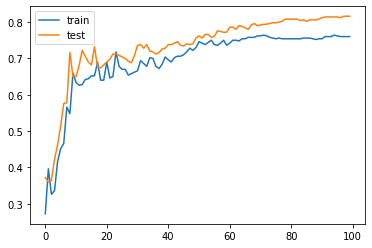

In [ ]:
# mlp for the blobs problem with batch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
import timeit
import numpy as np

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# set seed for reproducibility
np.random.seed(1)

# fit model
start = timeit.default_timer()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1, batch_size=len(trainX))
stop = timeit.default_timer()
print('Time taken: ', stop - start)  

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

### Stochastic Gradient Descent

In the previous example, the *Vanila Gradient Descent*, we used the full dataset to compute each step, that is, a `batch_size=dataset_size`.

We will now try a different approach. In this case, instead of using all the instances in our dataset, we'll try a stochastic approach in which only a single sample is used at each step. This drastically reduces the time taken to compute each iteration and the memory needed, but it adds some noise to the process, making the convergence process slower.

Let's check it practically:



Epoch 1/100
500/500 [==============================] - 1s 2ms/step - loss: 2.8956 - accuracy: 0.5949 - val_loss: 0.7780 - val_accuracy: 0.5860
Epoch 2/100
500/500 [==============================] - 1s 1ms/step - loss: 0.7462 - accuracy: 0.6618 - val_loss: 0.9816 - val_accuracy: 0.4680
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 0.9842 - accuracy: 0.4678 - val_loss: 0.9423 - val_accuracy: 0.5200
Epoch 4/100
500/500 [==============================] - 1s 1ms/step - loss: 0.9961 - accuracy: 0.5024 - val_loss: 0.9254 - val_accuracy: 0.5320
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 0.9196 - accuracy: 0.5291 - val_loss: 0.8493 - val_accuracy: 0.5940
Epoch 6/100
500/500 [==============================] - 1s 1ms/step - loss: 0.9446 - accuracy: 0.5459 - val_loss: 0.9481 - val_accuracy: 0.5180
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 0.9830 - accuracy: 0.5215 - val_loss: 1.1553 - val_accuracy: 0.6100

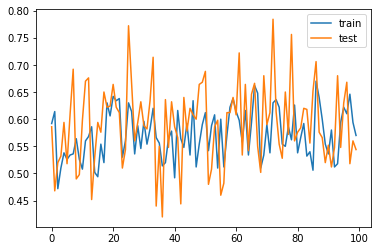

In [ ]:
# mlp for the blobs problem with stochastic gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
import timeit

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# set seed for reproducibility
np.random.seed(1)

# fit model
start = timeit.default_timer()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1, batch_size=1)
stop = timeit.default_timer()
print('Time taken: ', stop - start)  

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Look at the results! They are much worse, aren't them? How do you think we could improve them?

Since we are taking a random instance at each step to compute the gradients and update the weights, the network needs much many iterations (*epochs*) to converge. Look at the same example with 500 epochs:

Epoch 1/500
500/500 [==============================] - 1s 2ms/step - loss: 4.1149 - accuracy: 0.5931 - val_loss: 0.9254 - val_accuracy: 0.5480
Epoch 2/500
500/500 [==============================] - 1s 2ms/step - loss: 0.9504 - accuracy: 0.5883 - val_loss: 0.6078 - val_accuracy: 0.7880
Epoch 3/500
500/500 [==============================] - 1s 2ms/step - loss: 1.0627 - accuracy: 0.5314 - val_loss: 0.9650 - val_accuracy: 0.5400
Epoch 4/500
500/500 [==============================] - 1s 1ms/step - loss: 0.9783 - accuracy: 0.5498 - val_loss: 0.9787 - val_accuracy: 0.5120
Epoch 5/500
500/500 [==============================] - 1s 2ms/step - loss: 0.9976 - accuracy: 0.4472 - val_loss: 0.8777 - val_accuracy: 0.6420
Epoch 6/500
500/500 [==============================] - 1s 2ms/step - loss: 0.8686 - accuracy: 0.6151 - val_loss: 0.5757 - val_accuracy: 0.7660
Epoch 7/500
500/500 [==============================] - 1s 2ms/step - loss: 0.8239 - accuracy: 0.5731 - val_loss: 0.9149 - val_accuracy: 0.5700

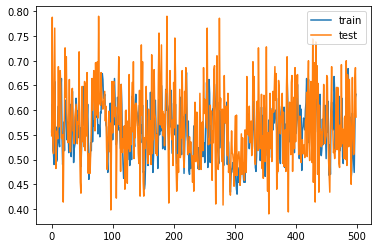

In [ ]:
# mlp for the blobs problem with stochastic gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
import timeit

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# set seed for reproducibility
np.random.seed(1)

# fit model
start = timeit.default_timer()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=1, batch_size=1)
stop = timeit.default_timer()
print('Time taken: ', stop - start)  

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

It's still very noisy, but it has got to a better point. If we left the network training longer it would get to a point with an accuracy similar to that of *Vanila Gradient Descent*. You can try with 1500 or 2000 epochs and see what happens.

It's also worth mentioning that we can change the optimiser for another one more complex, such as the *ADAM*, that adapts de learning rate of the different weights depending on their magnitude.

Look at this example with the ADAM optimiser:

Epoch 1/200
500/500 [==============================] - 1s 2ms/step - loss: 1.1869 - accuracy: 0.5852 - val_loss: 0.5141 - val_accuracy: 0.7900
Epoch 2/200
500/500 [==============================] - 1s 2ms/step - loss: 0.6446 - accuracy: 0.7435 - val_loss: 0.4462 - val_accuracy: 0.8200
Epoch 3/200
500/500 [==============================] - 1s 2ms/step - loss: 0.5027 - accuracy: 0.7624 - val_loss: 0.4470 - val_accuracy: 0.8140
Epoch 4/200
500/500 [==============================] - 1s 2ms/step - loss: 0.5071 - accuracy: 0.7590 - val_loss: 0.5404 - val_accuracy: 0.7500
Epoch 5/200
500/500 [==============================] - 1s 2ms/step - loss: 0.4942 - accuracy: 0.7713 - val_loss: 0.4315 - val_accuracy: 0.8020
Epoch 6/200
500/500 [==============================] - 1s 2ms/step - loss: 0.4808 - accuracy: 0.7507 - val_loss: 0.4274 - val_accuracy: 0.8240
Epoch 7/200
500/500 [==============================] - 1s 2ms/step - loss: 0.4255 - accuracy: 0.8205 - val_loss: 0.4148 - val_accuracy: 0.8180

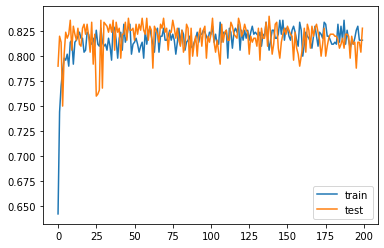

In [ ]:
# mlp for the blobs problem with stochastic gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from matplotlib import pyplot
import timeit

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# set seed for reproducibility
np.random.seed(1)

# fit model
start = timeit.default_timer()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1, batch_size=1)
stop = timeit.default_timer()
print('Time taken: ', stop - start)  

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

As you can see, in general, ADAM is faster reaching a good enough local minimum than SGD, that is, it's faster to converge. However, the SGD with momentum is very used in practice, since it's able to reach slightly better results with the appropriate tunning and more iterations.

### Mini-batch Stochastic Gradient Descent

When using *Mini-batch Stochastic Gradient Descent* the weight updates are performed using a *batch* or group of instances from the dataset, where that *batch* size is much lower than the total number of samples in the dataset.

By doing so, we manage to remove most noise in the gradient descent process while keeping the memory low and the process faster than with Vanila Gradient Descent.

Let's check how it works! We'll set a batch size of 32, but feel free to change it to other values and see the effect.

Epoch 1/200
16/16 [==============================] - 0s 14ms/step - loss: 1.0916 - accuracy: 0.5343 - val_loss: 0.8778 - val_accuracy: 0.5920
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 1.0551 - accuracy: 0.5768 - val_loss: 0.7722 - val_accuracy: 0.6820
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8006 - accuracy: 0.6551 - val_loss: 1.5182 - val_accuracy: 0.5060
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 0.9872 - accuracy: 0.6284 - val_loss: 0.7376 - val_accuracy: 0.7160
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 1.0892 - accuracy: 0.6362 - val_loss: 0.7417 - val_accuracy: 0.7380
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 0.8991 - accuracy: 0.6670 - val_loss: 0.5883 - val_accuracy: 0.7880
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.7106 - val_loss: 1.0191 - val_accuracy: 0.5520
Epoch 8/200


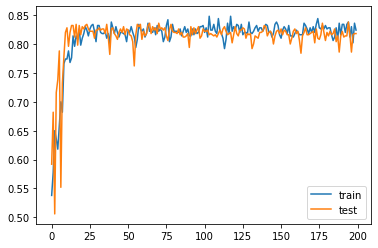

In [ ]:
# mlp for the blobs problem with minibatch gradient descent
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
import timeit

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# set seed for reproducibility
np.random.seed(1)

# fit model
start = timeit.default_timer()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1, batch_size=32)
stop = timeit.default_timer()
print('Time taken: ', stop - start)  

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()